<a href="https://colab.research.google.com/github/ShahkarHassan/SMART-CROWD-ANALYZER/blob/master/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Drive Mounter

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Preprcessing


In [16]:
fldr="/content/drive/My Drive/FYP/emotion/CK+48"


In [17]:
import os
files=os.listdir(fldr)
print(files)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [18]:
Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)




/content/drive/My Drive/FYP/emotion/CK+48/anger/S010_004_00000017.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S010_004_00000018.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S010_004_00000019.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S011_004_00000020.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S011_004_00000019.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S011_004_00000021.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S014_003_00000028.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S014_003_00000029.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S022_005_00000030.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S014_003_00000030.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S022_005_00000031.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S022_005_00000032.png   3
/content/drive/My Drive/FYP/emotion/CK+48/anger/S026_003_00000013.png   3
/content/drive/My Drive/FYP/emotion/CK

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
last

NameError: ignored

#### Fear

In [ ]:
cv2_imshow(images[24])

NameError: ignored

In [ ]:
cv2_imshow(images[40])

NameError: ignored

#### Contempt

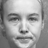

In [ ]:
cv2_imshow(images[139])

#### Happy

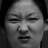

In [ ]:
cv2_imshow(images[349])

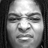

In [ ]:
cv2_imshow(images[300])

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
images_f=np.array(images)
labels_f=np.array(labels)

images_f_2=images_f/255


NameError: ignored

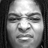

In [ ]:
cv2_imshow(images[300])

In [ ]:
images_f_2.shape

(981, 48, 48, 3)

In [ ]:
num_of_classes=7
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)



In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25)



#### Model

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(7,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam",
	metrics=["accuracy"])
  return model

In [ ]:
Model=model(input_shape = (48,48,3))

In [ ]:
Model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)       

#### Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=1000,callbacks=[callback_list])

Epoch 1/1000
23/23 [==============================] - ETA: 0s - loss: 2.0967 - accuracy: 0.2095
Epoch 00001: loss improved from inf to 2.09673, saving model to Emotion_detection.h5
23/23 [==============================] - 1s 29ms/step - loss: 2.0967 - accuracy: 0.2095 - val_loss: 1.9929 - val_accuracy: 0.3699
Epoch 2/1000
18/23 [======================>.......] - ETA: 0s - loss: 1.9795 - accuracy: 0.2361
Epoch 00002: loss improved from 2.09673 to 1.95856, saving model to Emotion_detection.h5
23/23 [==============================] - 0s 13ms/step - loss: 1.9586 - accuracy: 0.2490 - val_loss: 1.8577 - val_accuracy: 0.2886
Epoch 3/1000
19/23 [=======================>......] - ETA: 0s - loss: 1.9301 - accuracy: 0.2599
Epoch 00003: loss improved from 1.95856 to 1.91335, saving model to Emotion_detection.h5
23/23 [==============================] - 0s 13ms/step - loss: 1.9133 - accuracy: 0.2680 - val_loss: 1.8104 - val_accuracy: 0.2886
Epoch 4/1000
19/23 [=======================>......] - ETA: 

### Evaluation

In [ ]:
score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 0s 3ms/step - loss: 2.2464 - accuracy: 0.1810


In [ ]:
score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 3ms/step - loss: 2.2456 - accuracy: 0.2398


In [ ]:
Pred=Model.predict(X_test)

In [ ]:
Pred

array([[0.5190955 , 0.52021766, 0.51526755, ..., 0.52388465, 0.5105537 ,
        0.4940175 ],
       [0.5353318 , 0.52766293, 0.5242309 , ..., 0.53446066, 0.51910937,
        0.4903904 ],
       [0.5165908 , 0.51750976, 0.5145964 , ..., 0.5183896 , 0.50919914,
        0.49335212],
       ...,
       [0.5339558 , 0.528772  , 0.51163197, ..., 0.5356416 , 0.51848096,
        0.4881375 ],
       [0.5286349 , 0.5241898 , 0.5188591 , ..., 0.533335  , 0.51790094,
        0.49032485],
       [0.52610844, 0.5277436 , 0.52794755, ..., 0.53014946, 0.5128746 ,
        0.4922611 ]], dtype=float32)

In [ ]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(Pred)

246

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)



In [ ]:
test_image(980,images_f,images_f_2,Model)

NameError: ignored

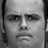

Label actual:  anger
Predicted Label: anger


In [ ]:
test_image(36,images_f,images_f_2,Model)

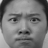

Label actual:  anger
Predicted Label: anger


In [ ]:
test_image(122,images_f,images_f_2,Model)

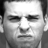

Label actual:  disgust
Predicted Label: disgust


In [ ]:
test_image(232,images_f,images_f_2,Model)

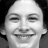

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(647,images_f,images_f_2,Model)

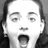

Label actual:  surprise
Predicted Label: surprise


In [ ]:
test_image(869,images_f,images_f_2,Model)

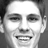

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(502,images_f,images_f_2,Model)

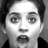

Label actual:  surprise
Predicted Label: contempt


In [ ]:
test_image(800,images_f,images_f_2,Model)


In [ ]:
import matplotlib.pyplot as plt


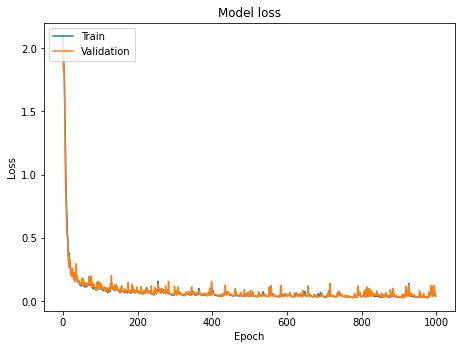

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

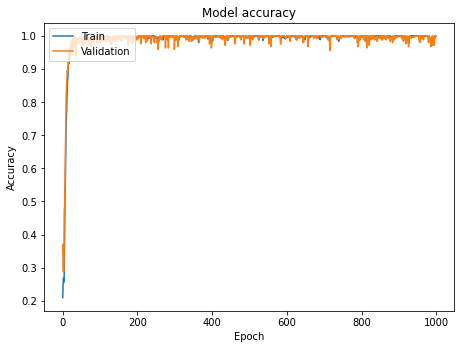

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1


In [ ]:

report=classification_report(Y_test_l, Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        16

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [ ]:

results = confusion_matrix(Y_test_l, Pred_l)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


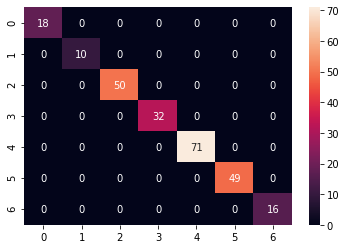

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [3]:
q=[]
import numpy as np
images_f=np.array(q)
images_f_2=images_f/255

In [4]:
def test(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)




In [14]:
import cv2
image= cv2.imread('/content/sample_data/111.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image= cv2.resize(image,(48,48))
q.append(image)
images_f=np.array(q)
images_f_2=images_f/255
from google.colab.patches import cv2_imshow

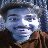

Predicted Label: happy


In [19]:
test(0,images_f,images_f_2,model)

In [ ]:
print(len(q))

1


In [12]:
model = tf.keras.models.load_model(
  '/content/drive/My Drive/FYP/Emotion_detection.h5'
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
 )

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)       